In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


We'll continue to make use of the fuel economy dataset in this workspace.

In [2]:
df = pd.read_csv("fuel-econ.csv")
df

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,39882,Toyota,Prius Prime,2018,Midsize Cars,Front-Wheel Drive,Automatic (variable gear ratios),Regular Gasoline,4,1.8,0,0,55.2206,78.8197,53.0000,73.6525,54.4329,78,10,10
3925,39898,Hyundai,Sonata Hybrid,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,0,106,39.0000,55.9000,44.3066,64.0000,41.0000,217,9,9
3926,39899,Hyundai,Sonata Hybrid SE,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,0,106,40.0000,56.0000,46.0000,64.0000,42.0000,212,9,9
3927,39900,Lexus,LS 500,2018,Midsize Cars,Rear-Wheel Drive,Automatic (S10),Premium Gasoline,6,3.4,99,0,19.2200,24.2000,30.2863,43.4000,23.0021,387,5,5


### **Task 1**: 
Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot. 

**Hint**: Completing this exercise will take multiple steps! Add additional code cells as needed in order to achieve the goal.

In [3]:
manufacturer_counts = df['make'].value_counts()
manufacturers_with_80_cars = manufacturer_counts[manufacturer_counts >= 80].index
filtered_df = df[df['make'].isin(manufacturers_with_80_cars)]

In [4]:
mean_comb_mileage = filtered_df.groupby('make')['comb'].mean()

In [5]:
sorted_manufacturers = mean_comb_mileage.sort_values().index

Text(0.5, 1.0, 'Distribution of Combined Fuel Mileage by Manufacturer (Minimum 80 Cars)')

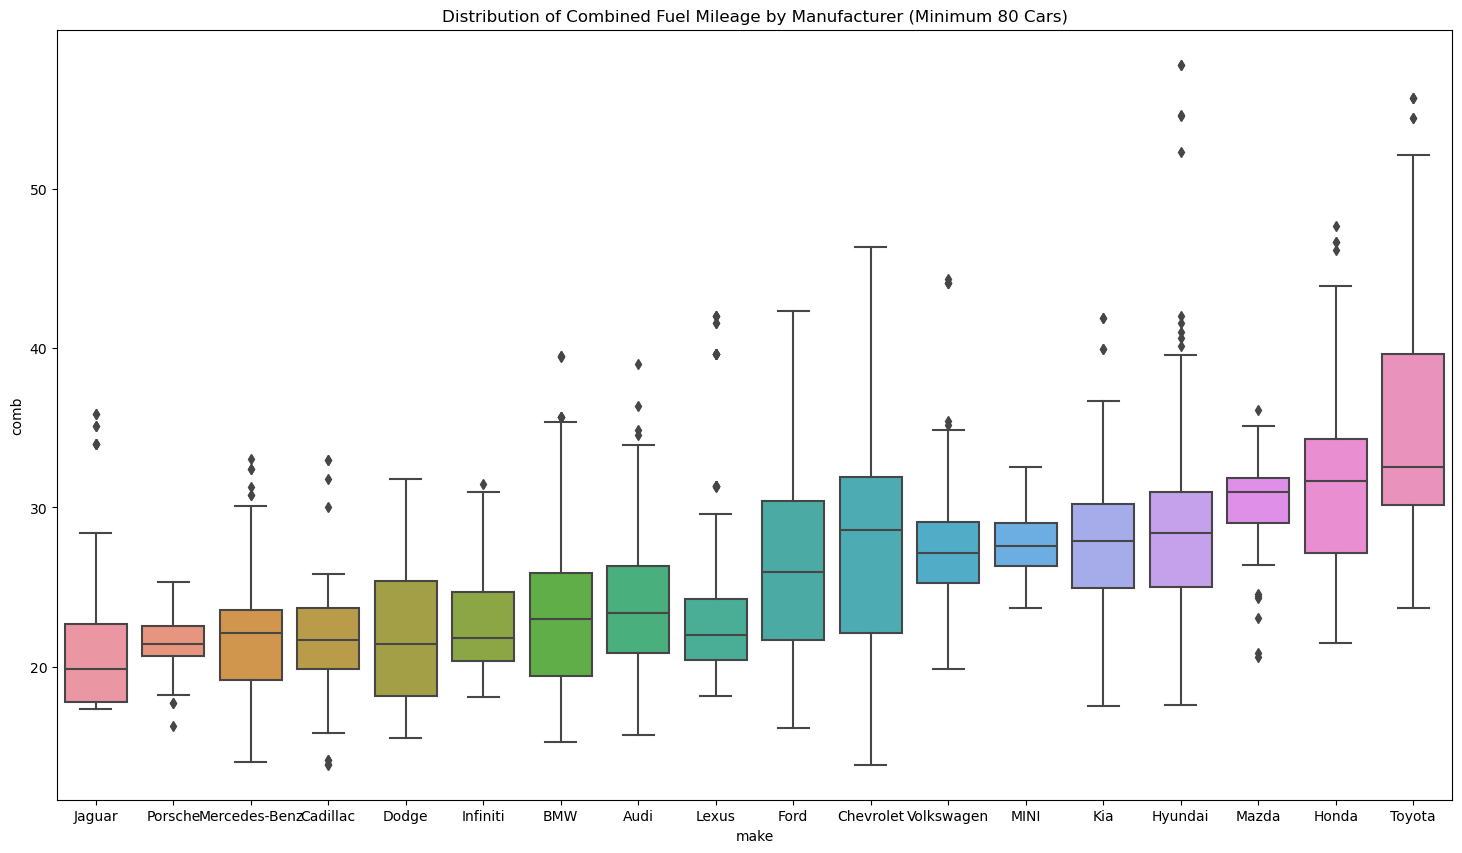

In [10]:
plt.figure(figsize=(18,10))
sb.boxplot(data=filtered_df, x='make', y='comb', order=sorted_manufacturers)
plt.title('Distribution of Combined Fuel Mileage by Manufacturer (Minimum 80 Cars)')

### **Task 2**: 
Continuing on from the previous task, plot the mean fuel efficiency for each manufacturer with at least 80 cars in the dataset.  Can you use error bars?

In [11]:
manufacturer_stats = filtered_df.groupby('make')['comb'].agg(['mean', 'std', 'count'])
manufacturer_stats = manufacturer_stats[manufacturer_stats['count'] >= 80]

<BarContainer object of 18 artists>

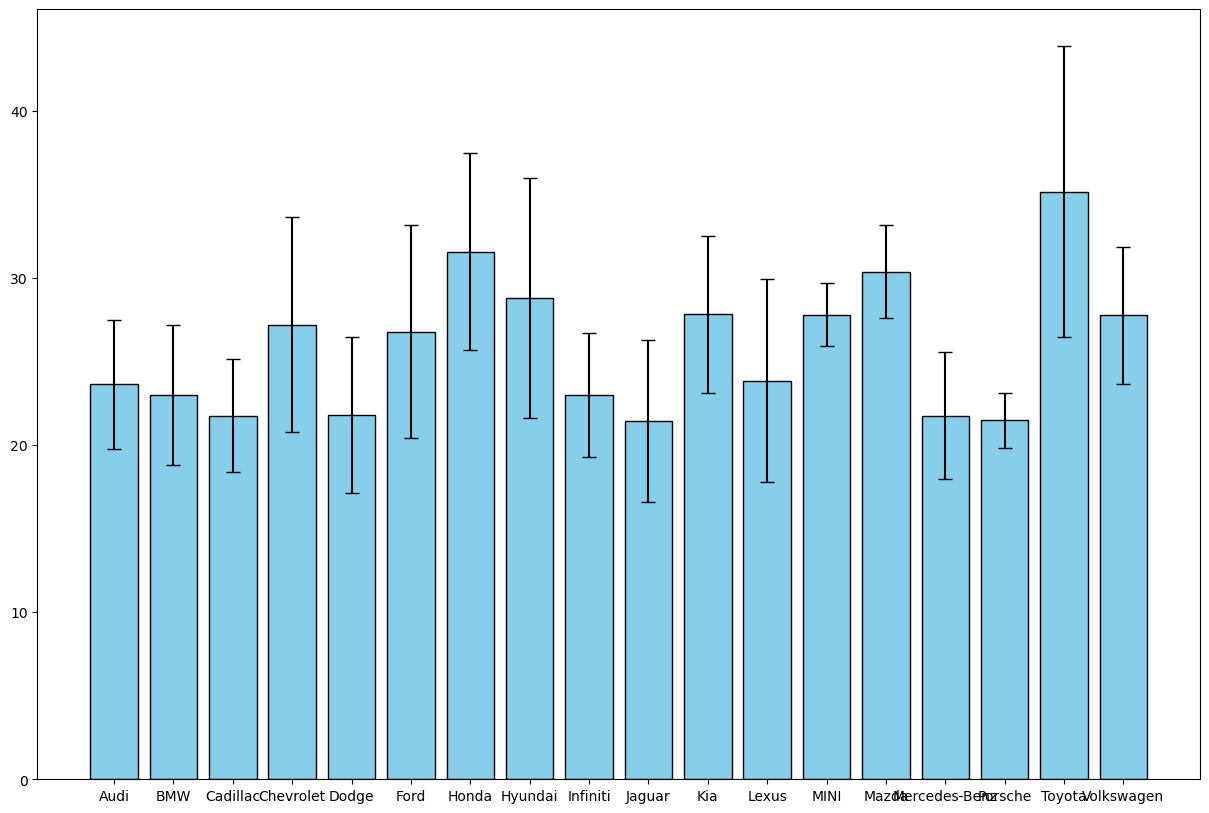

In [12]:
plt.figure(figsize=(15, 10))
plt.bar(manufacturer_stats.index,  manufacturer_stats['mean'], yerr=manufacturer_stats['std'],  capsize=5,  color='skyblue',  edgecolor='black')